In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.selectors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


# Read Hermes-3

In [88]:
db = CaseDB()

toload = [ 
    dict(name="2e19", id="d42acb-with_guards", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)
    
    

- Reading case d42acb-with_guards
-----------------------
- Looking for squash file
- Squash file found. squash date 09/03/2024, 10:49:23, dmp file date 09/03/2024, 10:28:10


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1138: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


In [89]:
hr = dict()
for name in cs.keys(): 
    print(name)
    hr[name] = Hermesdata()
    ds = cs[name].ds
    if "t" in ds.dims: ds = ds.isel(t=-1)
    hr[name].read_case(ds)

    
    ds = cs[name].ds
    # ds = calculate_radial_fluxes(ds, new_afn = True)
    # ds = calculate_target_fluxes(ds)
    # ds = reverse_pfr_fluxes(ds)

2e19
None 0.002


# Read SOLEDGE

In [90]:
soledgecases = {
    # "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    # "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    # "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    # "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    # "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    # "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


In [91]:
self = SOLEDGEcase(soledgecases["tightwall_2e19"])
dfpol = self.get_1d_poloidal_data(params = self.params, d_from_sep=0.002)
dfpar = self.get_1d_poloidal_data(params = self.params, d_from_sep=0.002, parallel_length = True)

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


# Read SOLPS

In [92]:
solpscases = {
    "tightwall_noD2_2e19_spectrum" : r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_tight_wall_orthogonal_spectra\X.NESEPM=2.0E+19",
    
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    # _ = read_last10s(solpscases[name], save = True)
    # sp[name].read_last10s(solpscases[name])
    sp[name].read_from_case(solpscases[name])

True


In [ ]:
sp["tightwall_noD2_2e19_spectrum"].regions["omp"]

# Hermes-3 OMP data

In [11]:
%matplotlib widget

# Selector debug

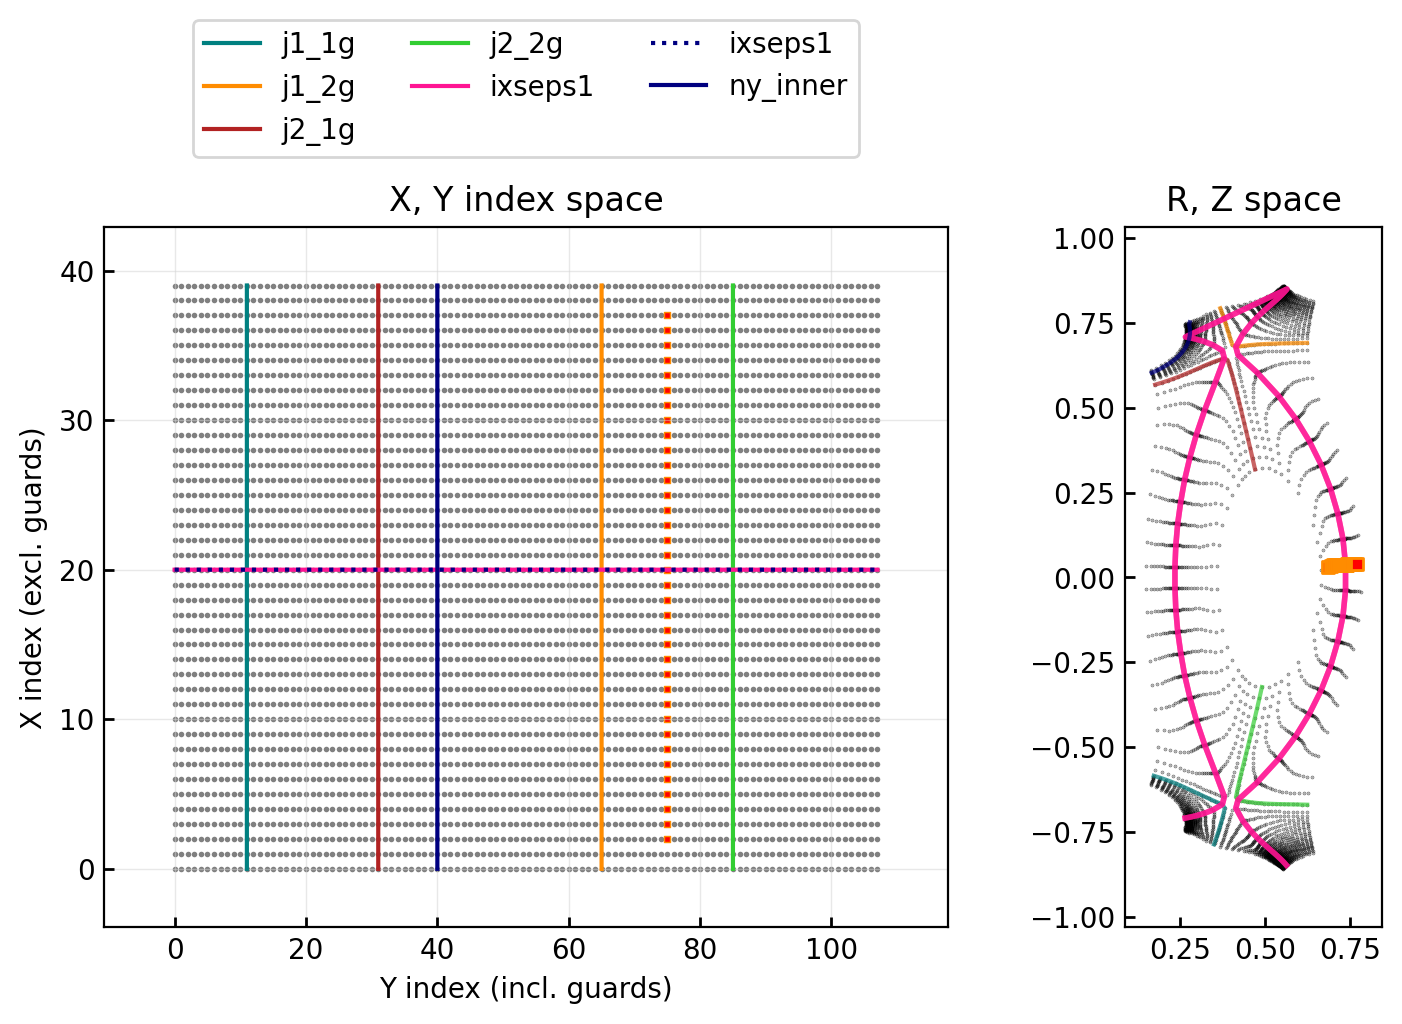

In [36]:
m = ds.metadata
span = 2
plot_selection(ds, ds.hermesm.select_region("outer_midplane_a"), dpi = 200)


In [ ]:
df["dr"] = reg["dr"].values

for i, _ in enumerate(df["dr"]):
    if i == 0:
        df.loc[i, "Srad"] = df.loc[i, "dr"] / 2
    else:
        df.loc[i, "Srad"] = df.loc[i-1, "Srad"] + df.loc[i-1, "dr"] + df.loc[i, "dr"]/2
    
df["sep"] = 0

sepind = ds.metadata["ixseps1g"]
df.loc[sepind, "sep"] = 1
dfsep = df[df["sep"] == 1]

# Correct so 0 is inbetween the cell centres straddling separatrix
sepcorr = (df["Srad"][sepind] - df["Srad"][sepind-1]) / 2

df["Srad"] -= dfsep["Srad"].values - sepcorr


In [42]:
%matplotlib inline

# Visual grid extent check

In [17]:
for store in [cs, sl, sp]:
    print(store.keys())

dict_keys(['2e19'])
dict_keys(['tightwall_2e19'])
dict_keys(['tightwall_noD2_2e19_spectrum'])


In [19]:
hermes = cs["2e19"].ds.isel(t=-1, x = slice(2,-2))
soledge = SOLEDGEcase(path = soledgecases["tightwall_2e19"])
solps = SOLPScase(path = solpscases["tightwall_noD2_2e19_spectrum"])

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


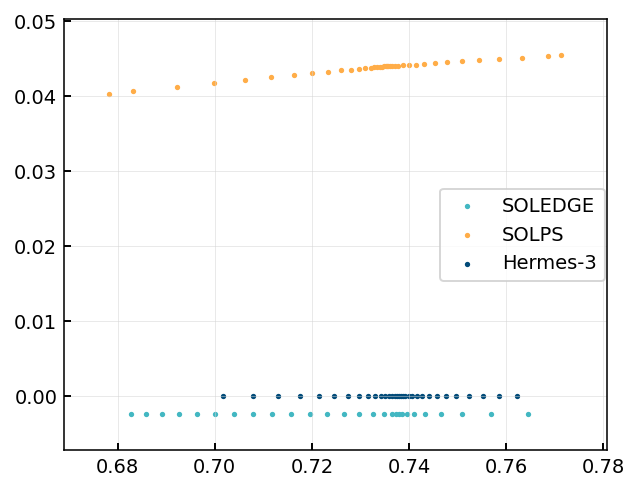

In [76]:
%matplotlib widget

1.3608689218969869e+17 5.846388330524162e+19


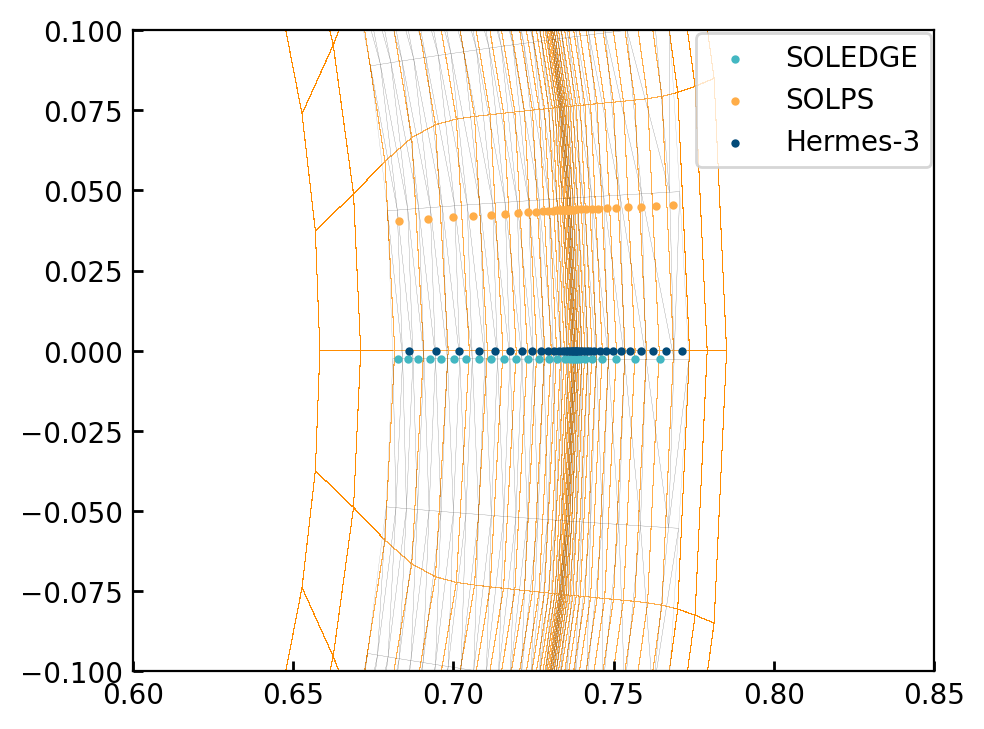

In [77]:
plt.close("all")
fig, ax = plt.subplots( dpi = 200)


# SOLPScase(solpscases["tightwall_2e19"]).plot_2d(ax = axes[1], param = "Dense", separatrix = False, linewidth = 0.1, grid_only = True)

ds["Te"].bout.polygon(ax = ax, 
                      add_colorbar = False, separatrix = False, grid_only = True,
                      linecolor = "darkorange", linewidth = 0.01)

soledge.plot_2d(fig = fig, ax = ax, param = "Dense", separatrix = False, linewidth = 0.1, grid_only = True, alpha = 0.3)

df_sl = soledge.get_1d_radial_data(params = ["Tempe"])
df_sl["Te"] = df_sl["Tempe"]
df_sp = solps.get_1d_radial_data(params = ["Te"], region = "omp")
df_hr = get_1d_radial_data(hermes, params = ["Te", "R", "Z"], region = "omp")

omp = ds.hermesm.select_region("outer_midplane_a")

style = dict(s = 4)
ax.scatter(df_sl["R"], df_sl["Z"], **style, label = "SOLEDGE")
ax.scatter(df_sp["R"], df_sp["Z"], **style, label = "SOLPS")
ax.scatter(df_hr["R"], df_hr["Z"], **style, label = "Hermes-3")
# ax.scatter(omp["R"], omp["Z"], **style, label = "Hermes-3 2")
ax.legend()

# for ax in axes:
ax.grid(False)
ax.set_xlim(0.6, 0.85)
ax.set_ylim(-0.1,0.1)
ax.set_xlabel("")
ax.set_title("")
ax.set_ylabel("")
fig.tight_layout()


# fig.savefig("grids.svg", format = "svg")

In [57]:
%matplotlib inline

## Map dist to R
- SOLEDGE looks odd

Text(0.5, 0, 'R coordinate')

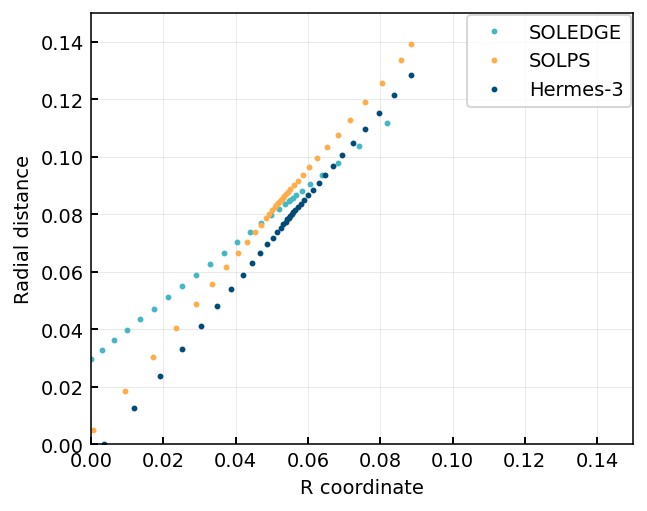

In [72]:
# fig, ax = plt.subplots()
# style = dict(marker = "o", lw = 0)

# ax.plot(df_sl["R"], df_sl["Te"], label = "SOLEDGE", **style)
# ax.plot(df_sp["R"], df_sp["Te"], label = "SOLPS", **style)
# ax.plot(df_hr["R"], df_hr["Te"], label = "Hermes-3", **style)
# ax.legend()

fig, ax = plt.subplots()
style = dict(marker = "o", lw = 0, ms = 2)

ax.plot(df_sl["R"] - df_sl["R"].iloc[0], df_sl["dist"] - df_sp["dist"][0], label = "SOLEDGE", **style)
ax.plot(df_sp["R"] - df_sl["R"].iloc[0], df_sp["dist"] - df_sp["dist"][0], label = "SOLPS", **style)
ax.plot(df_hr["R"] - df_sl["R"].iloc[0], df_hr["Srad"] - df_hr["Srad"][0], label = "Hermes-3", **style)
ax.legend()

# ax.set_aspect("equal")
ax.set_ylim(0,0.15)
ax.set_xlim(0,0.15)
ax.set_ylabel("Radial distance")
ax.set_xlabel("R coordinate")

# Lineplot test!

In [ ]:
slc = SOLEDGEcase(soledgecases["tightwall_2e19"])
slc.get_1d_radial_data(params = ["Tempe"], debug_line = True)

In [94]:
%matplotlib inline

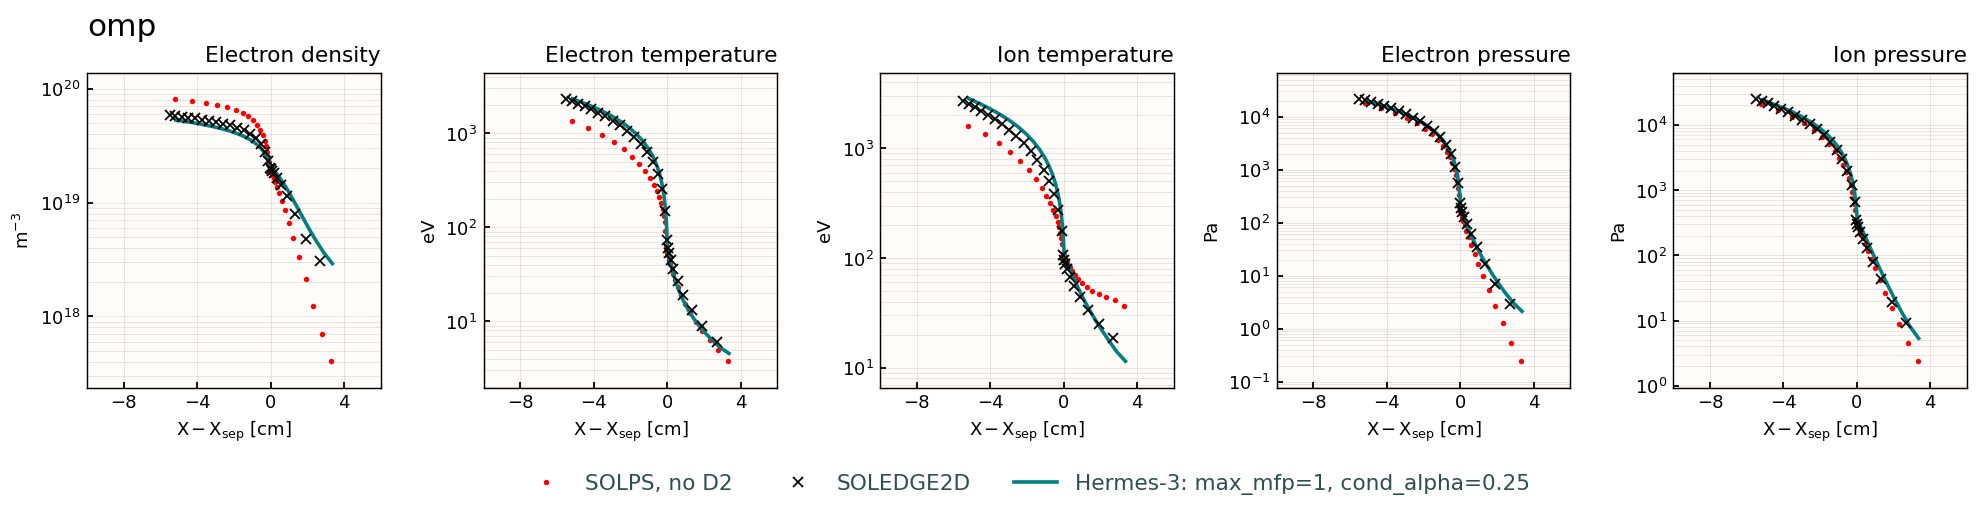

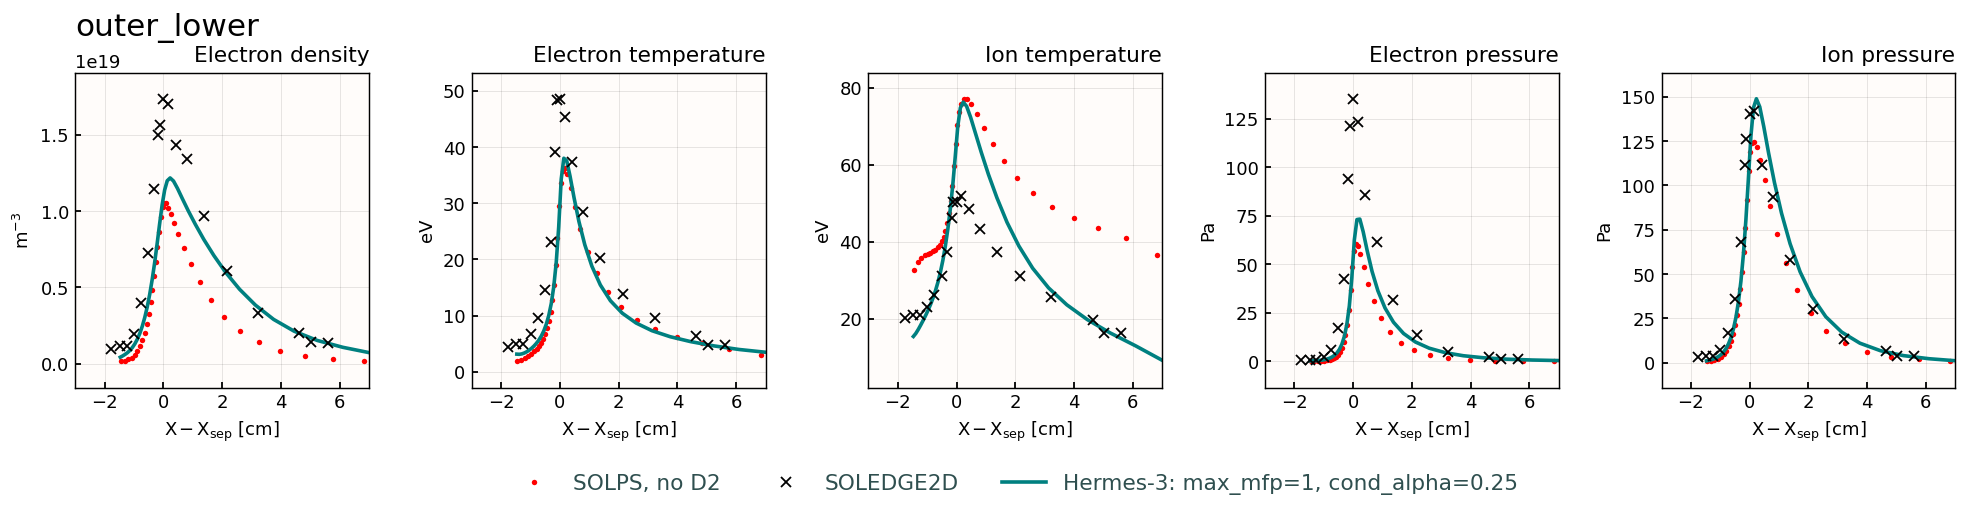

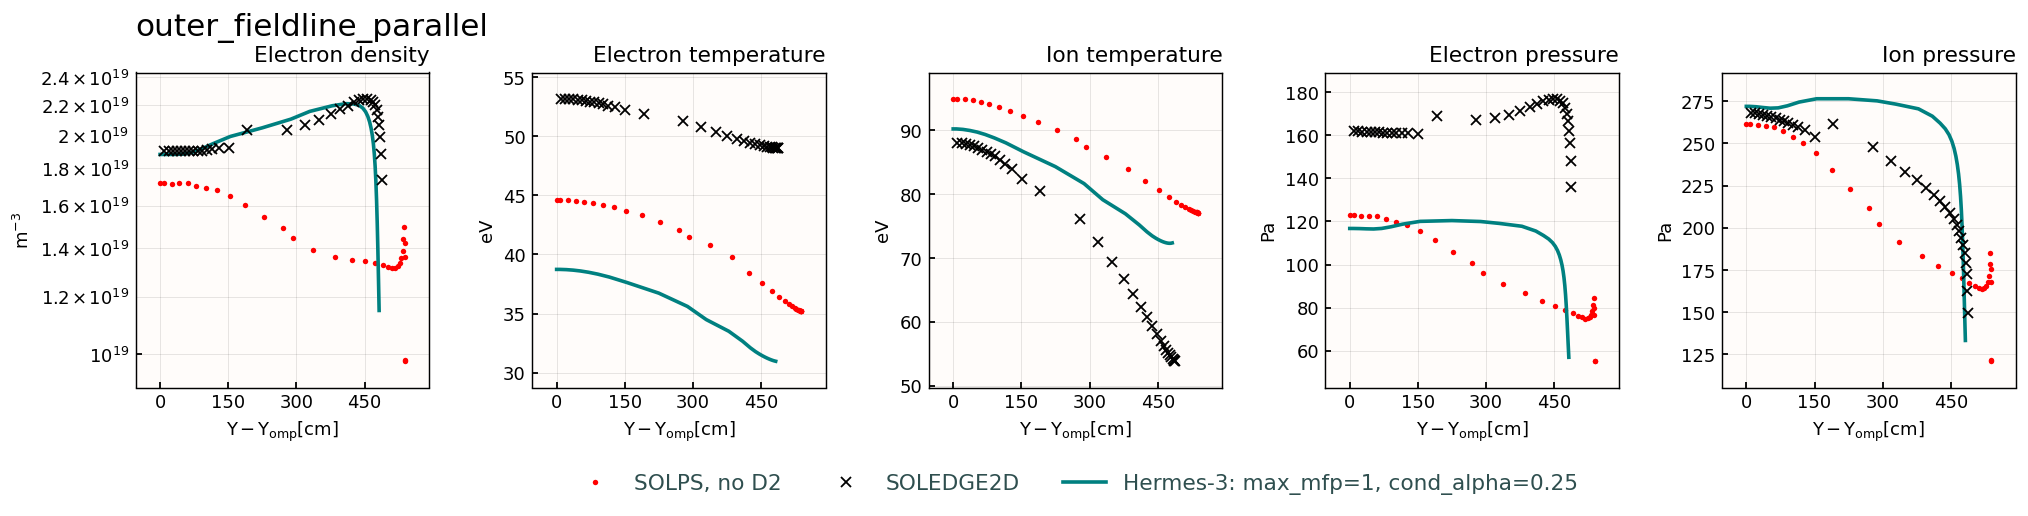

In [93]:
lineplot_compare(
    cases = { 

    "SOLPS, no D2" : dict(data=sp["tightwall_noD2_2e19_spectrum"], color="red"),
    "SOLEDGE2D" : dict(data=sl["tightwall_2e19"], color="black"),
    r"Hermes-3: max_mfp=1, cond_alpha=0.25" : dict(data=hr['2e19'], color = "teal"),

    },
    # regions = ["omp", "outer_lower", "outer_fieldline"],  
    regions = ["omp", "outer_lower", "outer_fieldline_parallel"],  
    # regions = ["outer_fieldline", "outer_fieldline_parallel"],  
    # params = ["Ne", "Te", "Td+", "Na", "Ta", "M"],
    params = ["Ne", "Te", "Td+", "Pe", "Pd+"],
    # params = ["Pe", "Pd+", "M", "NVd+", "Vd+"],
    # params = ["NVd+", "Vd+",  "M"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta"],
    mode = "log",
    dpi = 100,
    ylims = (5e17, 2e20),
    lw = 2,
    legend_nrows = 1,
    combine_molecules = False
)